#**Pet Adoption**

##Problem

Problem Statement

A leading pet adoption agency is planning to create a virtual tour experience for their customers showcasing all animals that are available in their shelter. To enable this tour experience, you are required to build a Machine Learning model that determines type and breed of the animal based on its physical attributes and other factors.


It is a multi-label or multi output classification problem.

 You have to predict two labels: 'breed_catagory' and 'pet_catagory'.
Formally, multi-label classification is the approach of finding a model that maps inputs, x to binary vectors, y (assigning a value of 0 or 1 for each element (label) in y).

How to solve it??
The best solution here is to train two models.
Build one classification model and predict the output.
Use the predicted output of 1st model as input feature to 2nd model.
you can also try multi-class classification i.e., predicting both labels simultaneously, but it will give you poor score.

##**Import Libraries**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

##**Load DataSEets Form Train And Test 'csv' File using Pandas lib Function**

## **Load Train DataSets**

In [2]:


Train_DataSets = pd.read_csv("train.csv")
Train_DataSets.head()

,pet_id,issue_date,listing_date,condition,color_type,length(m),height(cm),X1,X2,breed_category,pet_category
0,ANSL_69903,2016-07-10 00:00:00,2016-09-21 16:25:00,2.0,Brown Tabby,0.80,7.78,13,9,0.0,1
1,ANSL_66892,2013-11-21 00:00:00,2018-12-27 17:47:00,1.0,White,0.72,14.19,13,9,0.0,2
2,ANSL_69750,2014-09-28 00:00:00,2016-10-19 08:24:00,NaN,Brown,0.15,40.90,15,4,2.0,4
3,ANSL_71623,2016-12-31 00:00:00,2019-01-25 18:30:00,1.0,White,0.62,17.82,0,1,0.0,2
4,ANSL_57969,2017-09-28 00:00:00,2017-11-19 09:38:00,2.0,Black,0.50,11.06,18,4,0.0,1


##**Load Test DataSets**


In [3]:

Test_DataSets =  pd.read_csv("test.csv")
Test_DataSets.head()

,pet_id,issue_date,listing_date,condition,color_type,length(m),height(cm),X1,X2
0,ANSL_75005,2005-08-17 00:00:00,2017-09-07 15:35:00,0.0,Black,0.87,42.73,0,7
1,ANSL_76663,2018-11-15 00:00:00,2019-05-08 17:24:00,1.0,Orange Tabby,0.06,6.71,0,1
2,ANSL_58259,2012-10-11 00:00:00,2018-04-02 16:51:00,1.0,Black,0.24,41.21,0,7
3,ANSL_67171,2015-02-13 00:00:00,2018-04-06 07:25:00,1.0,Black,0.29,8.46,7,1
4,ANSL_72871,2017-01-18 00:00:00,2018-04-26 13:42:00,1.0,Brown,0.71,30.92,0,7


##**Data Perprocessing And Analysis**

In [4]:
Train_DataSets.shape  # Train DataSets Shape

(18834, 11)

In [5]:
Test_DataSets.shape  # Test DataSet Shape


(8072, 9)

In [6]:
Train_DataSets.info()  # Display Information About DataSets Type and More

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18834 entries, 0 to 18833
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   pet_id          18834 non-null  object 
 1   issue_date      18834 non-null  object 
 2   listing_date    18834 non-null  object 
 3   condition       17357 non-null  float64
 4   color_type      18834 non-null  object 
 5   length(m)       18834 non-null  float64
 6   height(cm)      18834 non-null  float64
 7   X1              18834 non-null  int64  
 8   X2              18834 non-null  int64  
 9   breed_category  18834 non-null  float64
 10  pet_category    18834 non-null  int64  
dtypes: float64(4), int64(3), object(4)
memory usage: 1.6+ MB


In [7]:
Train_DataSets.describe()  # Display 

,condition,length(m),height(cm),X1,X2,breed_category,pet_category
count,17357.000000,18834.000000,18834.000000,18834.000000,18834.000000,18834.000000,18834.000000
mean,0.883390,0.502636,27.448832,5.369598,4.577307,0.600563,1.709143
std,0.770434,0.288705,13.019781,6.572366,3.517763,0.629883,0.717919
min,0.000000,0.000000,5.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.250000,16.172500,0.000000,1.000000,0.000000,1.000000
50%,1.000000,0.500000,27.340000,0.000000,4.000000,1.000000,2.000000
75%,1.000000,0.760000,38.890000,13.000000,9.000000,1.000000,2.000000
max,2.000000,1.000000,50.000000,19.000000,9.000000,2.000000,4.000000


##Display Correlation between variables

In [8]:
Train_DataSets.corr() 

,condition,length(m),height(cm),X1,X2,breed_category,pet_category
condition,1.000000,-0.011219,-0.010793,0.338843,0.381696,-0.483503,-0.041660
length(m),-0.011219,1.000000,-0.004464,-0.002893,-0.011175,0.007229,-0.003999
height(cm),-0.010793,-0.004464,1.000000,-0.003801,-0.008216,0.011647,0.001976
X1,0.338843,-0.002893,-0.003801,1.000000,0.584396,0.240729,-0.032594
X2,0.381696,-0.011175,-0.008216,0.584396,1.000000,0.052530,-0.032116
breed_category,-0.483503,0.007229,0.011647,0.240729,0.052530,1.000000,0.209230
pet_category,-0.041660,-0.003999,0.001976,-0.032594,-0.032116,0.209230,1.000000


## Drow HeatMap Using Correlation  ("corr()")

Text(0.5, 1.0, 'Correlation HeatMap')

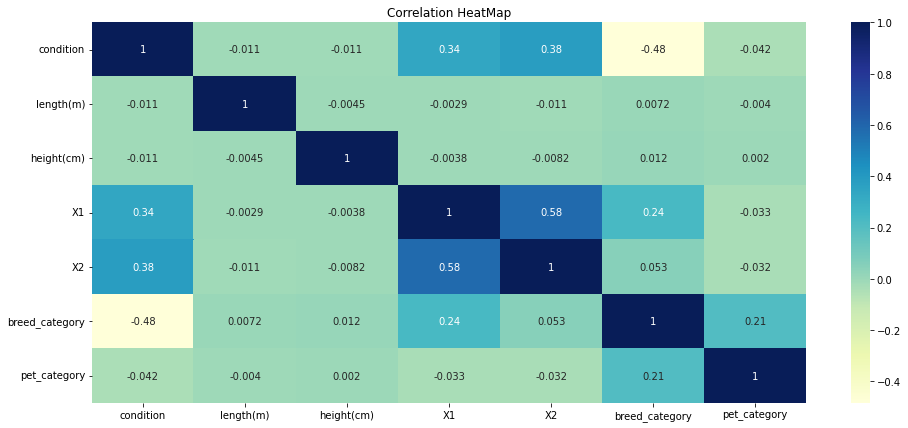

In [9]:
plt.figure(figsize=(16,7))
Heatmap=sns.heatmap(Train_DataSets.corr(),annot=True,cmap="YlGnBu")
Heatmap.set_title("Correlation HeatMap")


##**Analysis of missing values (NaNs)**
check Missing Value and Dealing with missing values

In [10]:
Train_DataSets.isna().sum()  # Check And Count Missing Values Using isna() and sum()

pet_id               0
issue_date           0
listing_date         0
condition         1477
color_type           0
length(m)            0
height(cm)           0
X1                   0
X2                   0
breed_category       0
pet_category         0
dtype: int64

In [11]:
Train_DataSets = Train_DataSets.fillna(method="ffill")
Train_DataSets.isna().sum()

pet_id            0
issue_date        0
listing_date      0
condition         0
color_type        0
length(m)         0
height(cm)        0
X1                0
X2                0
breed_category    0
pet_category      0
dtype: int64

## **Modify listing and issue date coloumn from object to datetime format**

In [12]:
issue_date = pd.to_datetime(Train_DataSets.issue_date)
issue_date

0       2016-07-10
1       2013-11-21
2       2014-09-28
3       2016-12-31
4       2017-09-28
           ...    
18829   2017-01-26
18830   2016-06-18
18831   2010-07-21
18832   2017-05-12
18833   2011-12-13
Name: issue_date, Length: 18834, dtype: datetime64[ns]

In [13]:
listing_date = pd.to_datetime(Train_DataSets.listing_date)
listing_date

0       2016-09-21 16:25:00
1       2018-12-27 17:47:00
2       2016-10-19 08:24:00
3       2019-01-25 18:30:00
4       2017-11-19 09:38:00
                ...        
18829   2018-03-09 15:35:00
18830   2017-07-09 08:37:00
18831   2018-08-22 14:27:00
18832   2018-02-08 14:05:00
18833   2018-10-26 14:18:00
Name: listing_date, Length: 18834, dtype: datetime64[ns]

## **creating a new coloumn (time duration for delivery)**

In [14]:
Train_DataSets["Time_Diff"] = listing_date - issue_date
Train_DataSets.Time_Diff

0         73 days 16:25:00
1       1862 days 17:47:00
2        752 days 08:24:00
3        755 days 18:30:00
4         52 days 09:38:00
               ...        
18829    407 days 15:35:00
18830    386 days 08:37:00
18831   2954 days 14:27:00
18832    272 days 14:05:00
18833   2509 days 14:18:00
Name: Time_Diff, Length: 18834, dtype: timedelta64[ns]

In [15]:
Train_DataSets["Time_Diff"] = Train_DataSets.Time_Diff.dt.total_seconds()

Train_DataSets.Time_Diff

0          6366300.0
1        160940820.0
2         65003040.0
3         65298600.0
4          4527480.0
            ...     
18829     35220900.0
18830     33381420.0
18831    255277620.0
18832     23551500.0
18833    216829080.0
Name: Time_Diff, Length: 18834, dtype: float64

## **applying log**

In [16]:
Train_DataSets["Time_Diff"] = np.log1p(Train_DataSets['Time_Diff'])
Train_DataSets.Time_Diff

/usr/local/lib/python3.7/dist-packages/pandas/core/arraylike.py:364: RuntimeWarning: invalid value encountered in log1p
  result = getattr(ufunc, method)(*inputs, **kwargs)


0        15.666529
1        18.896547
2        17.989945
3        17.994481
4        15.325676
           ...    
18829    17.377150
18830    17.323510
18831    19.357862
18832    16.974700
18833    19.194620
Name: Time_Diff, Length: 18834, dtype: float64

## F**ind Depandent and Indepandent variables using datasets,where x are independent values and y : dependent values**

In [17]:
X = Train_DataSets.drop(['breed_category' , 'pet_category'],axis=1)
X.head()

,pet_id,issue_date,listing_date,condition,color_type,length(m),height(cm),X1,X2,Time_Diff
0,ANSL_69903,2016-07-10 00:00:00,2016-09-21 16:25:00,2.0,Brown Tabby,0.80,7.78,13,9,15.666529
1,ANSL_66892,2013-11-21 00:00:00,2018-12-27 17:47:00,1.0,White,0.72,14.19,13,9,18.896547
2,ANSL_69750,2014-09-28 00:00:00,2016-10-19 08:24:00,1.0,Brown,0.15,40.90,15,4,17.989945
3,ANSL_71623,2016-12-31 00:00:00,2019-01-25 18:30:00,1.0,White,0.62,17.82,0,1,17.994481
4,ANSL_57969,2017-09-28 00:00:00,2017-11-19 09:38:00,2.0,Black,0.50,11.06,18,4,15.325676


##**Traget Variables**

In [18]:
y1=Train_DataSets['breed_category']  
y1.head()

0    0.0
1    0.0
2    2.0
3    0.0
4    0.0
Name: breed_category, dtype: float64

In [19]:
y2=Train_DataSets['pet_category']
y2.head()

0    1
1    2
2    4
3    2
4    1
Name: pet_category, dtype: int64

##**Features Seleaction**

Seleact Required Features form  X independent Variables to build a model that can predict breed_category Ang pet_category

In [20]:
X_Features = X.iloc[:,3:]
X_Features.head()

,condition,color_type,length(m),height(cm),X1,X2,Time_Diff
0,2.0,Brown Tabby,0.80,7.78,13,9,15.666529
1,1.0,White,0.72,14.19,13,9,18.896547
2,1.0,Brown,0.15,40.90,15,4,17.989945
3,1.0,White,0.62,17.82,0,1,17.994481
4,2.0,Black,0.50,11.06,18,4,15.325676


##**Catgorical data**
As we can see in the above output,the color_type column contains categorical variables which are not suitable to apply directly for fitting in model.So we need to encode this variable.

In [21]:
from sklearn.preprocessing import LabelEncoder
col=['color_type']
for c in col:
  LabelEncoder=LabelEncoder()
  X_Features['color_type']=LabelEncoder.fit_transform(X_Features.color_type)

X_Features.head()

,condition,color_type,length(m),height(cm),X1,X2,Time_Diff
0,2.0,18,0.80,7.78,13,9,15.666529
1,1.0,53,0.72,14.19,13,9,18.896547
2,1.0,15,0.15,40.90,15,4,17.989945
3,1.0,53,0.62,17.82,0,1,17.994481
4,2.0,2,0.50,11.06,18,4,15.325676


##**Splitting Data into train and test**

In [22]:
from sklearn.model_selection import train_test_split

# For y1 Prediction

X1_train,X1_test,y1_train,y1_test=train_test_split(X_Features,y1 ,test_size=0.2 ,random_state=0)



In [23]:
# For y2 Prediction

X2_train,X2_test,y2_train,y2_test=train_test_split(X_Features,y2 ,test_size=0.2 ,random_state=0)


##**Machine Learning Models**

 Training the XGBRegressor model Using Training set


##**APPROACH :**
The idea here is to predict breed_category first and join it with train_data and train one more model and predict pet_category.

##**XGB Classifier Model**

In [56]:
from xgboost import XGBClassifier
XGB_Model = XGBClassifier()

XGB_Model.fit(X1_train,y1_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, monotone_constraints='()',
              n_estimators=100, n_jobs=0, num_parallel_tree=1,
              objective='multi:softprob', random_state=0, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=None, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)


XGBClassifier(gpu_id=-1, interaction_constraints='', learning_rate=0.300000012,
              max_depth=6, monotone_constraints='()', n_jobs=0,
              num_parallel_tree=1, objective='multi:softprob',
              scale_pos_weight=None, tree_method='exact', validate_parameters=1,
              verbosity=None)

##**y1 Prediction**
Predicting the Test set Results

In [57]:
Y1_Pred= XGB_Model.predict(X1_test)
Y1_Pred = pd.Series(Y1_Pred)
Y1_Pred

0       0.0
1       1.0
2       0.0
3       0.0
4       0.0
       ... 
3762    0.0
3763    0.0
3764    1.0
3765    2.0
3766    2.0
Length: 3767, dtype: float64

##**Validation of Model**

In [58]:
from sklearn.metrics import accuracy_score
acc= accuracy_score(y1_test,Y1_Pred)
print("Accuracy of madel is : " ,acc)


Accuracy of madel is :  0.8797451552959915


##**y2 Prediction**

In [59]:
XGB_Model.fit(X2_train,y2_train)

Y2_Pred= XGB_Model.predict(X2_test)
Y2_Pred = pd.Series(Y2_Pred)
Y2_Pred

0       2
1       2
2       1
3       1
4       2
       ..
3762    1
3763    2
3764    2
3765    1
3766    4
Length: 3767, dtype: int64

## Accuracy of y2 model Prediction

In [60]:
from sklearn.metrics import accuracy_score
y2_acc= accuracy_score(y2_test,Y2_Pred)
print("Accuracy of madel is : " ,y2_acc)



Accuracy of madel is :  0.8863817361295461


##**Evaluation Metric:**

In [61]:
from sklearn.metrics import f1_score
Y1_f1_Score=f1_score(y1_test,Y1_Pred ,average="micro")
Y1_f1_Score

0.8797451552959915

In [62]:
Y2_f1_Score=f1_score(y2_test,Y2_Pred ,average="micro")
Y2_f1_Score

0.8863817361295461

In [63]:
S1 = Y1_f1_Score + Y2_f1_Score

score=100*S1/2

print("Score is : ",score)

Score is :  88.30634457127688


##=======================***Submission***======================

In [39]:
Test_DataSets =  pd.read_csv("test.csv")
Test_DataSets.head()

,pet_id,issue_date,listing_date,condition,color_type,length(m),height(cm),X1,X2
0,ANSL_75005,2005-08-17 00:00:00,2017-09-07 15:35:00,0.0,Black,0.87,42.73,0,7
1,ANSL_76663,2018-11-15 00:00:00,2019-05-08 17:24:00,1.0,Orange Tabby,0.06,6.71,0,1
2,ANSL_58259,2012-10-11 00:00:00,2018-04-02 16:51:00,1.0,Black,0.24,41.21,0,7
3,ANSL_67171,2015-02-13 00:00:00,2018-04-06 07:25:00,1.0,Black,0.29,8.46,7,1
4,ANSL_72871,2017-01-18 00:00:00,2018-04-26 13:42:00,1.0,Brown,0.71,30.92,0,7


In [40]:
Test_DataSets.shape

(8072, 9)

In [41]:
Test_DataSets.isna().sum() # Check And Count Missing Values Using isna() and sum()

pet_id            0
issue_date        0
listing_date      0
condition       619
color_type        0
length(m)         0
height(cm)        0
X1                0
X2                0
dtype: int64

In [42]:
Test_DataSets = Test_DataSets.fillna(method="ffill")
Test_DataSets.isna().sum()

pet_id          0
issue_date      0
listing_date    0
condition       0
color_type      0
length(m)       0
height(cm)      0
X1              0
X2              0
dtype: int64

In [43]:
Test_issue_data = pd.to_datetime(Test_DataSets.issue_date)
Test_issue_data

0      2005-08-17
1      2018-11-15
2      2012-10-11
3      2015-02-13
4      2017-01-18
          ...    
8067   2016-02-10
8068   2015-12-07
8069   2015-12-08
8070   2016-06-28
8071   2016-02-02
Name: issue_date, Length: 8072, dtype: datetime64[ns]

In [44]:
Test_listing_date = pd.to_datetime(Test_DataSets.listing_date)
Test_listing_date

0      2017-09-07 15:35:00
1      2019-05-08 17:24:00
2      2018-04-02 16:51:00
3      2018-04-06 07:25:00
4      2018-04-26 13:42:00
               ...        
8067   2017-03-10 14:56:00
8068   2018-02-12 00:00:00
8069   2017-01-04 17:19:00
8070   2017-07-20 18:19:00
8071   2017-02-28 16:47:00
Name: listing_date, Length: 8072, dtype: datetime64[ns]

In [45]:
Test_DataSets["Time_Diff"] = Test_listing_date - Test_issue_data
Test_DataSets.Time_Diff

0      4404 days 15:35:00
1       174 days 17:24:00
2      1999 days 16:51:00
3      1148 days 07:25:00
4       463 days 13:42:00
              ...        
8067    394 days 14:56:00
8068    798 days 00:00:00
8069    393 days 17:19:00
8070    387 days 18:19:00
8071    392 days 16:47:00
Name: Time_Diff, Length: 8072, dtype: timedelta64[ns]

In [46]:
Test_DataSets["Time_Diff"] = Test_DataSets.Time_Diff.dt.total_seconds()

Test_DataSets.Time_Diff

0       380561700.0
1        15096240.0
2       172774260.0
3        99213900.0
4        40052520.0
           ...     
8067     34095360.0
8068     68947200.0
8069     34017540.0
8070     33502740.0
8071     33929220.0
Name: Time_Diff, Length: 8072, dtype: float64

In [47]:
Test_DataSets["Time_Diff"] = np.log1p(Test_DataSets['Time_Diff'])
Test_DataSets.Time_Diff

0       19.757159
1       16.529956
2       18.967496
3       18.412789
4       17.505702
          ...    
8067    17.344672
8068    18.048852
8069    17.342387
8070    17.327138
8071    17.339787
Name: Time_Diff, Length: 8072, dtype: float64

In [48]:
from sklearn.preprocessing import LabelEncoder
col=['color_type']
for c in col:
  LabelEncoder=LabelEncoder()
  Test_DataSets['color_type']=LabelEncoder.fit_transform(Test_DataSets.color_type)
Test_DataSets.head()

,pet_id,issue_date,listing_date,condition,color_type,length(m),height(cm),X1,X2,Time_Diff
0,ANSL_75005,2005-08-17 00:00:00,2017-09-07 15:35:00,0.0,2,0.87,42.73,0,7,19.757159
1,ANSL_76663,2018-11-15 00:00:00,2019-05-08 17:24:00,1.0,36,0.06,6.71,0,1,16.529956
2,ANSL_58259,2012-10-11 00:00:00,2018-04-02 16:51:00,1.0,2,0.24,41.21,0,7,18.967496
3,ANSL_67171,2015-02-13 00:00:00,2018-04-06 07:25:00,1.0,2,0.29,8.46,7,1,18.412789
4,ANSL_72871,2017-01-18 00:00:00,2018-04-26 13:42:00,1.0,14,0.71,30.92,0,7,17.505702


In [49]:
Test_Features = Test_DataSets.iloc[:,3:]
Test_Features

,condition,color_type,length(m),height(cm),X1,X2,Time_Diff
0,0.0,2,0.87,42.73,0,7,19.757159
1,1.0,36,0.06,6.71,0,1,16.529956
2,1.0,2,0.24,41.21,0,7,18.967496
3,1.0,2,0.29,8.46,7,1,18.412789
4,1.0,14,0.71,30.92,0,7,17.505702
...,...,...,...,...,...,...,...
8067,2.0,14,0.82,36.08,13,9,17.344672
8068,0.0,46,0.49,27.54,13,9,18.048852
8069,0.0,2,0.98,37.19,0,7,17.342387
8070,0.0,2,0.79,23.83,0,2,17.327138


In [50]:
finally_Pred= XGB_Model.predict(Test_Features)
finally_Pred = pd.Series(finally_Pred)
finally_Pred

0       2
1       1
2       2
3       2
4       2
       ..
8067    2
8068    2
8069    2
8070    2
8071    2
Length: 8072, dtype: int64

In [51]:
XGB_Model.fit(X1_train,y1_train)
finally_Pred1= XGB_Model.predict(Test_Features)
finally_Pred1 = pd.Series(finally_Pred1)
finally_Pred1

0       1.0
1       0.0
2       0.0
3       0.0
4       0.0
       ... 
8067    1.0
8068    1.0
8069    1.0
8070    2.0
8071    1.0
Length: 8072, dtype: float64

In [52]:
Csv_file= pd.DataFrame(data={"pet_id":Test_DataSets.pet_id ,"breed_category":finally_Pred1 ,"pet_category":finally_Pred })
Csv_file

,pet_id,breed_category,pet_category
0,ANSL_75005,1.0,2
1,ANSL_76663,0.0,1
2,ANSL_58259,0.0,2
3,ANSL_67171,0.0,2
4,ANSL_72871,0.0,2
...,...,...,...
8067,ANSL_66809,1.0,2
8068,ANSL_59041,1.0,2
8069,ANSL_60034,1.0,2
8070,ANSL_58066,2.0,2


In [96]:
Csv_file.to_csv("Submission.csv")